<a href="https://colab.research.google.com/github/furkancimen/COT5600/blob/master/hw2/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

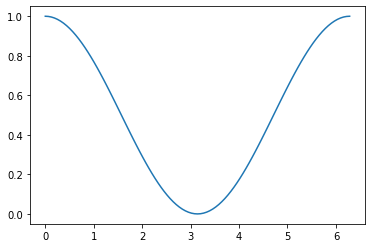

In [8]:
import numpy as np
from numpy import cos, sin, exp, sqrt, pi
import scipy.linalg as LA
import matplotlib.pyplot as plt


np.set_printoptions(precision=3, suppress=True)


# Defien identity operator
Id = np.eye(2)

# Define our zero qubit
Zero = np.array([[1.0],
                 [0.0]])
# Define out one qubit
One = np.array([[0.0],
                [1.0]])

# P_0 = |0><0|
P_0 = np.dot(Zero, Zero.T)

# P_1 = |1><1|
P_1 = np.dot(One, One.T)

# Define Hadamard opeartion
Hadamard = 1./sqrt(2) * np.array([[1, 1],
                                  [1, -1]])
HadamardZeroOnTwo = np.kron(Hadamard, Id)

# Define rotation matrix
def rotation_matrix(theta):
  return np.array([[cos(theta), -sin(theta)],
                   [sin(theta), cos(theta)]])
  
# States should be unit amplitude
def normalize_state(state):
  return state/LA.norm(state)

# Unitary operation controlled by 0 and applied to 1 for theta_delta
# Define theta steps
delta_theta = 2*pi/100
CUnitary01 = np.kron(P_0, Id) + np.kron(P_1, rotation_matrix(delta_theta))


# Form our 2 qubit with |psi> = 0
ZeroZero = np.kron(Zero, Zero)

# Apply hadamard to the first qubit
NewState = np.dot(HadamardZeroOnTwo, ZeroZero)


LastState_array = [np.dot(HadamardZeroOnTwo, NewState)]
AfterUnitaryState = np.dot(CUnitary01, NewState)
for index in range(100):
  TheLastHadamardState = np.dot(HadamardZeroOnTwo, AfterUnitaryState)
  LastState_array.append(TheLastHadamardState)
  AfterUnitaryState = np.dot(CUnitary01, AfterUnitaryState)

#Find probability of measuring 0 on qubit 0
Prob0_array = []
for state in LastState_array:
  Prob0 = np.trace(np.dot(np.kron(P_0, Id), state))
  Prob0_array.append(Prob0)



thetaVal_array = np.array(list(range(101))) * 2 * pi/100
plt.plot(thetaVal_array, Prob0_array)


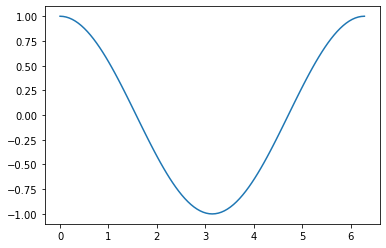

In [16]:
import numpy as np
from numpy import cos, sin, exp, sqrt, pi
import scipy.linalg as LA
import matplotlib.pyplot as plt


np.set_printoptions(precision=3, suppress=True)

def NKron(*args):
  """Calculate a Kronecker product over a variable number of inputs"""
  result = np.array([[1.0]])
  for op in args:
    result = np.kron(result, op)
  return result

# Defien identity operator
Id = np.eye(2)

# Define our zero qubit
Zero = np.array([[1.0],
                 [0.0]])
# Define out one qubit
One = np.array([[0.0],
                [1.0]])

# P_0 = |0><0|
P_0 = np.dot(Zero, Zero.T)

# P_1 = |1><1|
P_1 = np.dot(One, One.T)

# Define Hadamard opeartion
Hadamard = 1./sqrt(2) * np.array([[1, 1],
                                  [1, -1]])
HadamardZeroOnThree = NKron(Hadamard, Id, Id)

# Define SWAP operator
Swap = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])
ControlledSwap = np.kron(np.kron(P_0, Id), Id) + np.kron(P_1, Swap)

q1 = Zero
def q2(theta):
  return np.array([[cos(theta)],
                   [sin(theta)]])

NewState = np.dot(Hadamard, Zero)

thetaVal_array = np.array(list(range(101))) * 2 * pi/100  
LastState_array = []

for theta in thetaVal_array:
  ThreeQubitState = NKron(NewState, q1, q2(theta))
  SwapOperation = np.dot(ControlledSwap, ThreeQubitState)
  TheLastHadamardState = np.dot(HadamardZeroOnThree, SwapOperation)
  LastState_array.append(TheLastHadamardState)

#Find probability of measuring 0 on qubit 0
Prob0_array = []
for state in LastState_array:
  Prob0 = np.trace(np.dot(NKron(P_0, Id, Id), state))
  Prob0_array.append(Prob0)

plt.plot(thetaVal_array, Prob0_array)
